In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
df = pd.read_csv('3.12. Example.csv')
df.head(11)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

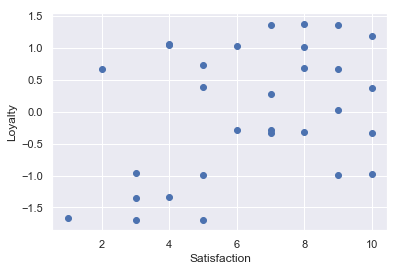

In [3]:
plt.scatter(df['Satisfaction'], df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [4]:
x = df.copy()

In [5]:
km = KMeans(2)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
clus = km.fit_predict(x)
clus

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1])

In [7]:
Data_with_cluster = df.copy()
Data_with_cluster['Cluster'] = clus
Data_with_cluster

,Satisfaction,Loyalty,Cluster
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


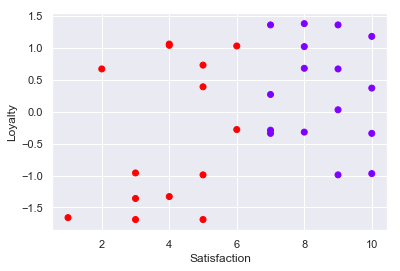

In [8]:
plt.scatter(Data_with_cluster['Satisfaction'], Data_with_cluster['Loyalty'], c = Data_with_cluster['Cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [9]:
x_scaled = preprocessing.scale(x)
x_scaled

C:\Users\khan0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [10]:
wcss = []

for i in range(1,10):
    km = KMeans(i)
    km.fit(x)
    wcss.append(km.inertia_)

In [11]:
wcss

[229.16347000000002,
 74.54254375000001,
 50.13624491341991,
 34.42895833333333,
 26.7682625,
 21.459241904761903,
 18.070350238095237,
 14.116463333333334,
 11.240346666666667]

Text(0, 0.5, 'wcss')

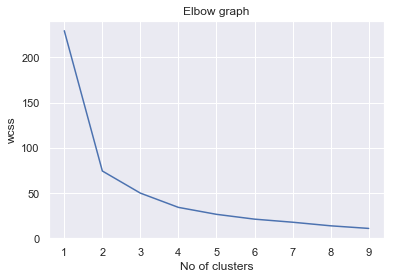

In [12]:
plt.plot(range(1,10),wcss)
plt.title('Elbow graph')
plt.xlabel('No of clusters')
plt.ylabel('wcss')

In [13]:
kmnew = KMeans(5)
kmnew.fit(x_scaled)
cluster_new =  x.copy()
cluster_new['New_cluster'] = kmnew.fit_predict(x_scaled)

In [14]:
cluster_new

,Satisfaction,Loyalty,New_cluster
0,4,-1.33,3
1,6,-0.28,1
2,5,-0.99,3
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,3
6,10,-0.97,4
7,8,-0.32,1
8,8,1.02,2
9,8,0.68,2


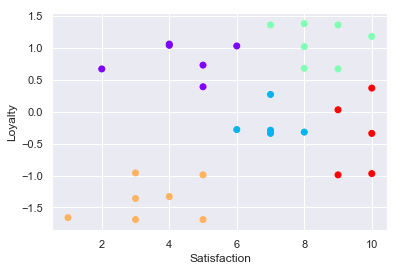

In [15]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c = cluster_new['New_cluster'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()